# EDA & t-test

#### nyc_citibike.csv 를 이용해 'Pershing Square North' 와 'Broadway & E 22 St ' 의 주행시간(trip_duration)  의 평균이 같은지 알아보는 t-test 를 진행해보세요. 
#### 조건)

>* 주행시간의 단위는 분(min) 으로 계산한다. 
>* 'Pershing Square North' 와 'Broadway & E 22 St ' 은 반납지점을 의미한다.
>* 각 지점에서 반납한 자전거의 주행시간은 독립이라고 가정한다.
>* t-test 를 진행하기 전 관련 변수에 관해 EDA 를 진행한다. 


### EDA
조건에 맞게 데이터를 가공하고 'Pershing Square North' 와 'Broadway & E 22 St ' 에 반납한 자전거의 주행시간을 적절한 그래프로 나타내세요.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

# warming 제거
import warnings
warnings.filterwarnings('ignore')

# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것
%matplotlib inline 

In [4]:
# 한글 꺠짐 
import matplotlib.pyplot as plt 
import platform                

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': #맥os 사용자의 경우
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':#윈도우 사용자의 경우
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)

In [5]:
df = pd.read_csv("nyc_citibike.csv")
# 분석 결과의 이해를 돕기위해 데이터 단위를 바꿔줄 수도 있다.
df['trip_duration_min']=df['trip_duration'] /60

In [6]:
df['end_station_name'].value_counts().nlargest(10)

Pershing Square North                750
West St & Chambers St                562
W 21 St & 6 Ave                      486
8 Ave & W 31 St                      461
Broadway & E 22 St                   448
W 22 St & 10 Ave                     433
E 17 St & Broadway                   424
8 Ave & W 33 St                      419
Grand Army Plaza & Central Park S    414
W 16 St & 8 Ave                      414
Name: end_station_name, dtype: int64

In [7]:
df_cut=df[df['end_station_name'].isin(['Pershing Square North','Broadway & E 22 St'])]

In [8]:
df_cut['end_station_name'].value_counts()

Pershing Square North    750
Broadway & E 22 St       448
Name: end_station_name, dtype: int64

In [9]:
df_cut.head()

,start_date,end_date,start_hour,end_hour,trip_duration,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,usertype,birth_year,gender,day_since_register,trip_duration_min
372,2018-05-01,2018-05-01,0,0,1155,499,Broadway & W 60 St,40.769155,-73.981918,402,Broadway & E 22 St,40.740343,-73.989551,18539,Subscriber,1955,male,47,19.250000
497,2018-05-01,2018-05-01,0,0,893,478,11 Ave & W 41 St,40.760301,-73.998842,519,Pershing Square North,40.751873,-73.977706,31214,Subscriber,1959,male,5,14.883333
567,2018-05-01,2018-05-01,0,0,591,312,Allen St & Stanton St,40.722055,-73.989111,402,Broadway & E 22 St,40.740343,-73.989551,25999,Subscriber,1993,male,56,9.850000
631,2018-05-01,2018-05-01,0,0,682,478,11 Ave & W 41 St,40.760301,-73.998842,519,Pershing Square North,40.751873,-73.977706,25781,Subscriber,1974,male,58,11.366667
719,2018-05-01,2018-05-02,23,0,500,3260,Mercer St & Bleecker St,40.727064,-73.996621,402,Broadway & E 22 St,40.740343,-73.989551,31653,Subscriber,1986,male,34,8.333333


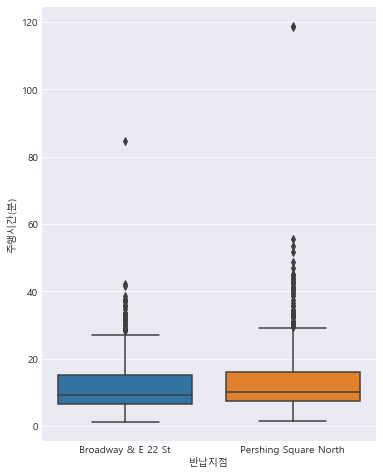

In [10]:
plt.figure(figsize=(6,8))
box=sns.boxplot(x='end_station_name',y='trip_duration_min',data=df_cut)
box.set_xlabel("반납지점")
box.set_ylabel("주행시간(분)")
plt.show()

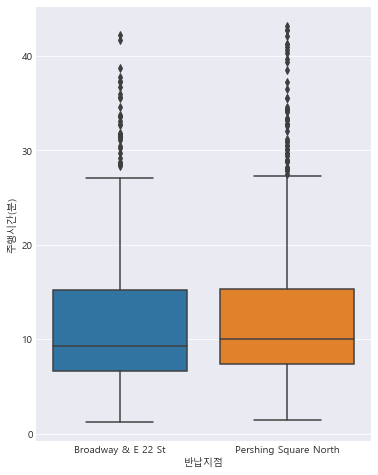

In [11]:
df_cut=df_cut[df_cut['trip_duration_min']<df_cut['trip_duration_min'].quantile(0.99)]

plt.figure(figsize=(6,8))
box=sns.boxplot(x='end_station_name',y='trip_duration_min',data=df_cut)
box.set_xlabel("반납지점")
box.set_ylabel("주행시간(분)")
plt.show()

### T-test
귀무가설은 무엇일까요?

In [12]:
# H0: 두 지점의 평균은 같다

어떤 T-test 를 적용해야할까요?

In [13]:
# 독립 표본 t-test 

분석해봅시다!

In [14]:
pershing=df_cut[df_cut['end_station_name']=='Pershing Square North']['trip_duration_min']
broadway=df_cut[df_cut['end_station_name']=='Broadway & E 22 St']['trip_duration_min']

### 정규성 검정

In [15]:
from scipy.stats import ks_2samp
ks_2samp(pershing,broadway)

Ks_2sampResult(statistic=0.08963984827431713, pvalue=0.02103668765802491)

H0: 두 분포 모두 정규분포를 따른다

p-value 가 0.05보다 작으므로 두 표본 모두 정규분포를 따르지"는" 않는다. 
(한개만 정규분포를 따를 수도 있어요!)    

하지만, 우리는 정규성을 따르지 않는다고 하면 더더 복잡해지기 때문에 생략할게요..ㅎ
정규분포를 따른다고 가정합시다

### 등분산검정

In [17]:
from scipy.stats import bartlett
bartlett(pershing,broadway)

BartlettResult(statistic=1.0657052043179762, pvalue=0.30191755741581616)

H0: 두 분포가 등분산이다    
p-value 가 0.05 보다 크므로 등분산성 가정을 만족한다.

In [19]:
from scipy.stats import ttest_ind 
ttest_ind(pershing,broadway,equal_var= True)

Ttest_indResult(statistic=1.0374109523433235, pvalue=0.2997561930501138)

분석 결과를 해석해주세요

In [20]:
# pvalue 가 유의수준 0.05보다 크기 떄문에 귀무가설을 기각할 수 없다
# 즉, 두 지점의 평균은 같다. 

## 퀘스트 피드백
>* 많은 분들이 n 을 30으로 정해주셨는데, n 이 30보다 큰 경우도 t-test 를 해도 됩니다. n 이 커지면 t분포와 normal 분포가 비슷해지는것이지, t분포를 따르지 않는 것은 아닙니다. 
>* 문제 풀이 방식의 차이인데, 우리가 가지고 있는 자료를 모집단으로 보고 30개씩 뽑아서 검정을 시행할 수도 있고, 우리가 가지고 있는 자료를 표본으로 보고 지구상 전체 인구를 모집단으로 볼 수도 있어요. 보통의 경우 우리가 가지고 있는 자료는 표본입니다. 
>* 정규성검정을 해주신 분들 잘하셨어요!! 자료의 크기가 애매할 경우 정규성, 독립성, 등분산성 검정해야합니다!!